# Frequency Bias Experiments


In [1]:
%load_ext autoreload
%autoreload 2
import datasets
import utils
import numpy as np
import hyperopt as hp
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr
import pickle as pkl
import glob

def plot_bar_mse(apkl, title="", **kwargs):
    mse = [np.sum((apkl["baseline_sample"] - x) ** 2) / np.prod(apkl["baseline_sample"].shape[1:]) for x in apkl["Xsamples"]]
    bar_width = [apkl["percent_range"][i + 1] - apkl["percent_range"][i] for i in range(len(apkl["percent_range"]) - 1)]
    plt.title(title)
    plt.xlabel("Frequency Removed")
    plt.ylabel("MSE")
    plt.bar(apkl["percent_range"][:-1], mse, bar_width, align="edge", edgecolor="black", linewidth=1)
    
def plot_bar_imp(apkl, title="", **kwargs):
    rel_importance = [apkl["baseline_acc"] - x for x in apkl["removed_acc"]]
    bar_width = [apkl["percent_range"][i + 1] - apkl["percent_range"][i] for i in range(len(apkl["percent_range"]) - 1)]
    plt.title(title)
    plt.xlabel("Frequency Removed")
    plt.ylabel("Importance")
    plt.bar(apkl["percent_range"][:-1], rel_importance, bar_width, align="edge", edgecolor="black", linewidth=1)
    

def plot_graph_mda(apkl, title="", **kwargs):
    removed_acc = apkl["removed_acc"]
    percent_range = apkl["percent_range"]
    baseline_acc = apkl["baseline_acc"]
    
    plt.ylabel("Accuracy")
    plt.xlabel("Removed Band (not in scale)")
    plot = plt.plot(range(len(removed_acc)), removed_acc, **kwargs)
    colorplot = plot[0].get_color()
    plt.plot(range(len(removed_acc)), [baseline_acc] * len(removed_acc), color=colorplot, label="Baseline " + kwargs["label"])
    _ = plt.xticks(ticks=range(len(removed_acc)), labels=["-".join([str(percent_range[i]), str(percent_range[i + 1])]) for i in range(len(percent_range) -1)])
    
def plot_examples(apkl, width, base_height, ex1, ex2, ex3):
    base_sample = apkl["baseline_sample"]
    base_sample = np.maximum(base_sample, 0)
    base_sample = np.minimum(base_sample, 1)
    Xsamples = apkl["Xsamples"]
    Xsamples = np.maximum(Xsamples, 0)
    Xsamples = np.minimum(Xsamples, 1)
    percent_range = apkl["percent_range"]

    height = base_height * (len(Xsamples) + 1)
    num_figs = 3 * (len(Xsamples) + 1)
    plt.figure(figsize=(width, height))

    plt.subplot(num_figs, 3, 1)
    plt.title("Original")
    plt.imshow(base_sample[ex1])
    plt.subplot(num_figs, 3, 2)
    plt.title("Original")
    plt.imshow(base_sample[ex2])
    plt.subplot(num_figs, 3, 3)
    plt.title("Original")
    plt.imshow(base_sample[ex3])

    for i in range(len(Xsamples)):
        base = 3 * (i + 1)
        plt.subplot(num_figs, 3, base + 1)
        plt.title("%d-%d" % (percent_range[i], percent_range[i + 1]))
        plt.imshow(Xsamples[i][ex1])
        
        plt.subplot(num_figs, 3, base + 2)
        plt.title("%d-%d" % (percent_range[i], percent_range[i + 1]))
        plt.imshow(Xsamples[i][ex2])
    
        plt.subplot(num_figs, 3, base + 3)
        plt.title("%d-%d" % (percent_range[i], percent_range[i + 1]))
        plt.imshow(Xsamples[i][ex3])

## RestrictedImageNet

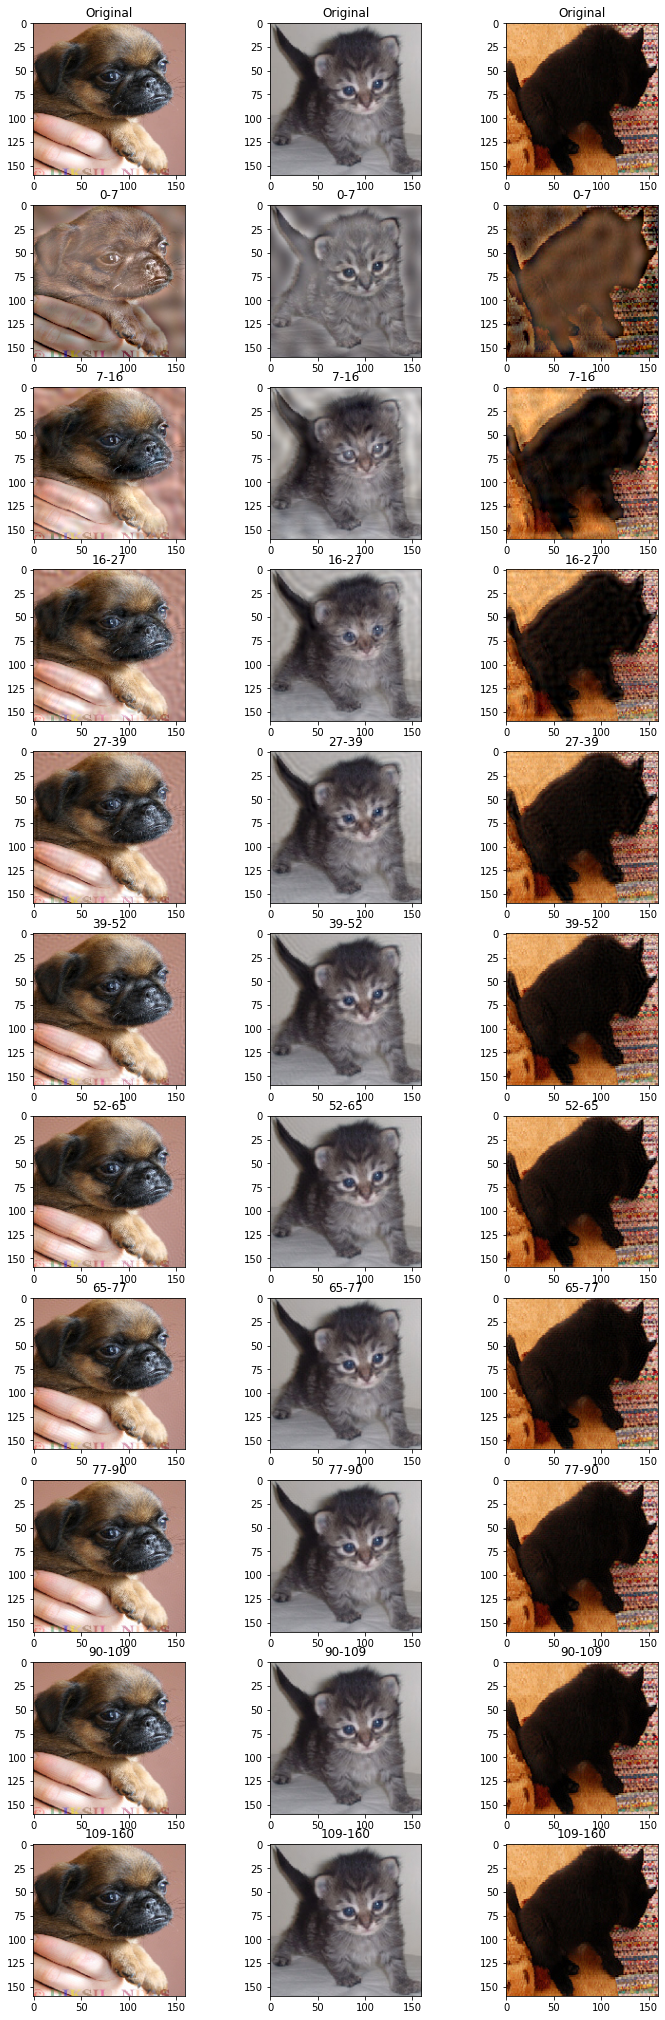

In [14]:
rin_examples = pkl.load(open("RestrictedImageNet_EXAMPLES.pkl", "rb"))
plot_examples(rin_examples, 12, 10, 0, 5, 7)

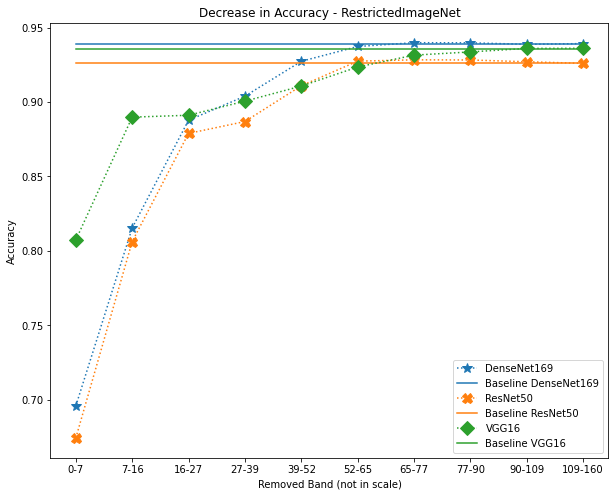

In [57]:
densenet_rin = pkl.load(open("2020-11-10_RestrictedImageNet_64DenseNet169_MDA.pkl", "rb"))
resnet_rin = pkl.load(open("2020-09-13_RestrictedImageNet_ResNet50_MDA.pkl", "rb"))
vgg16_rin = pkl.load(open('2020-09-14_RestrictedImageNet_64VGG16_MDA.pkl', 'rb'))

plt.figure(figsize=(10, 8))
plt.title("Decrease in Accuracy - RestrictedImageNet")
plot_graph_mda(densenet_rin, label="DenseNet169", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_rin, label="ResNet50", linestyle="dotted", marker="X", markersize=10)
plot_graph_mda(vgg16_rin, label="VGG16", linestyle="dotted", marker="D", markersize=10)
plt.legend()

## VGGFace2

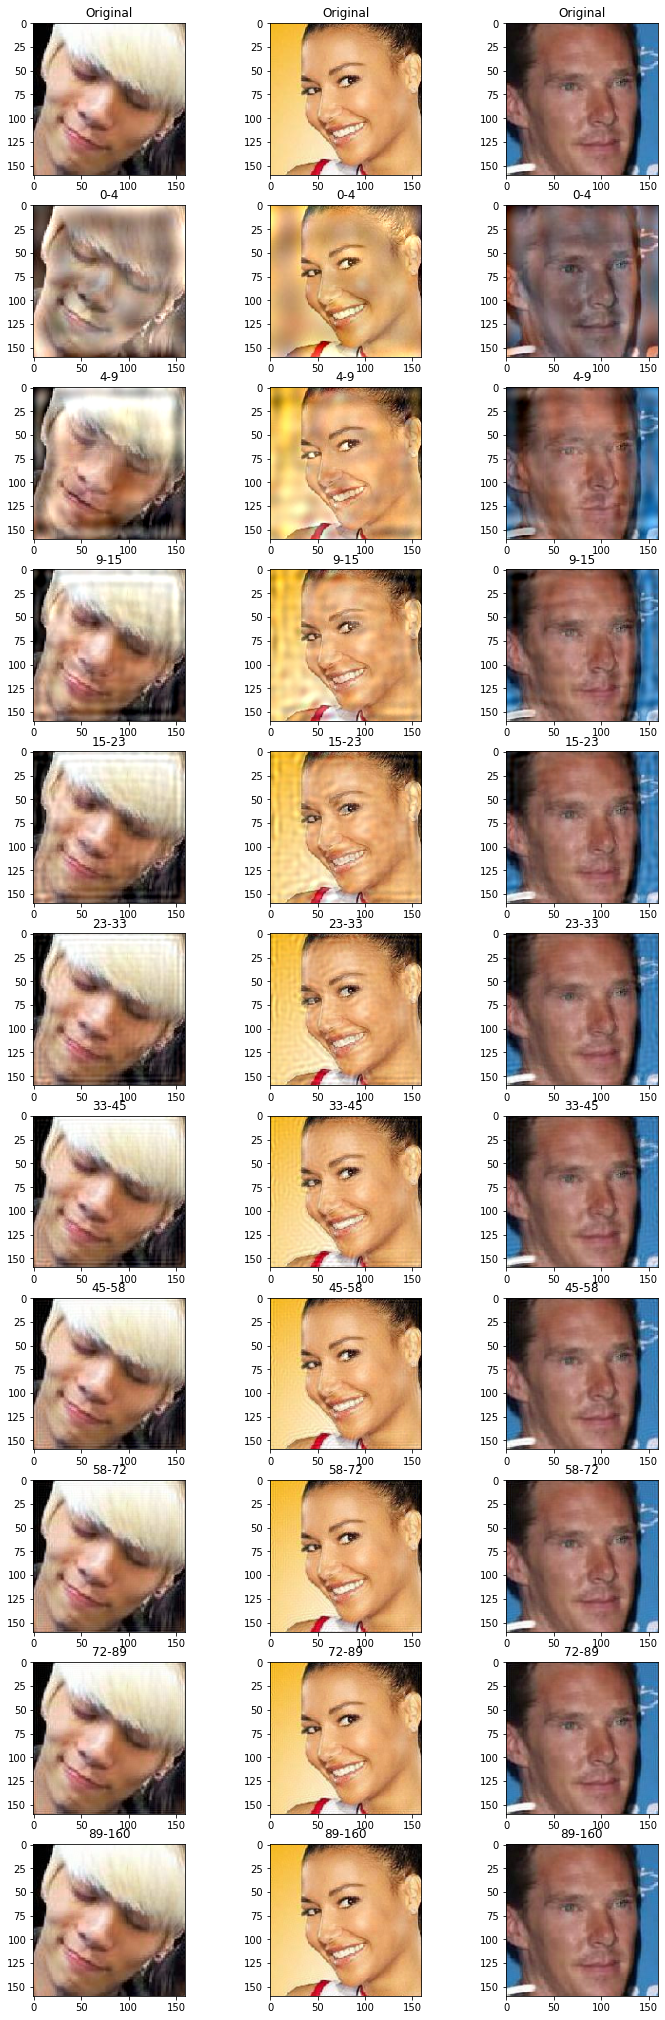

In [15]:
vgg_examples = pkl.load(open("VGGFace2_EXAMPLES.pkl","rb"))
plot_examples(vgg_examples, 12, 10, 0, 1, 7)

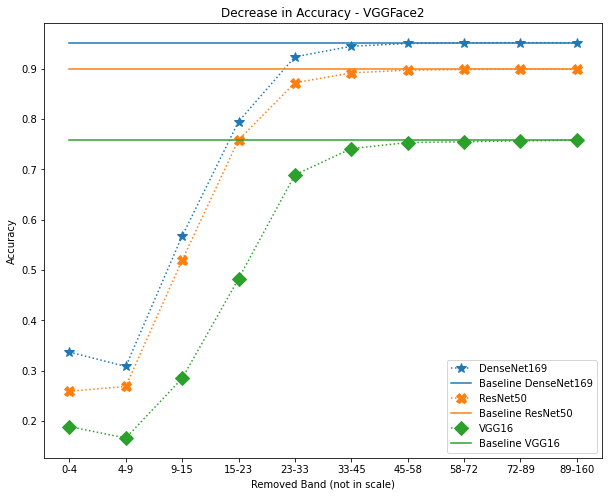

In [90]:
densenet_vggface = pkl.load(open("2020-11-10_VGGFace2_64DenseNet169_10_MDA.pkl", "rb"))
resnet_vggface = pkl.load(open("2020-09-20_VGGFace2_64ResNet50_10_MDA.pkl", "rb"))
vgg16_vggface = pkl.load(open('2020-11-23_VGGFace2_64VGG16_3_MDA.pkl', "rb"))

plt.figure(figsize=(10, 8))
plt.title("Decrease in Accuracy - VGGFace2")
plot_graph_mda(densenet_vggface, label="DenseNet169", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_vggface, label="ResNet50", linestyle="dotted", marker="X", markersize=10)
plot_graph_mda(vgg16_vggface, label="VGG16", linestyle="dotted", marker="D", markersize=10)
plt.legend()

## CIFAR10

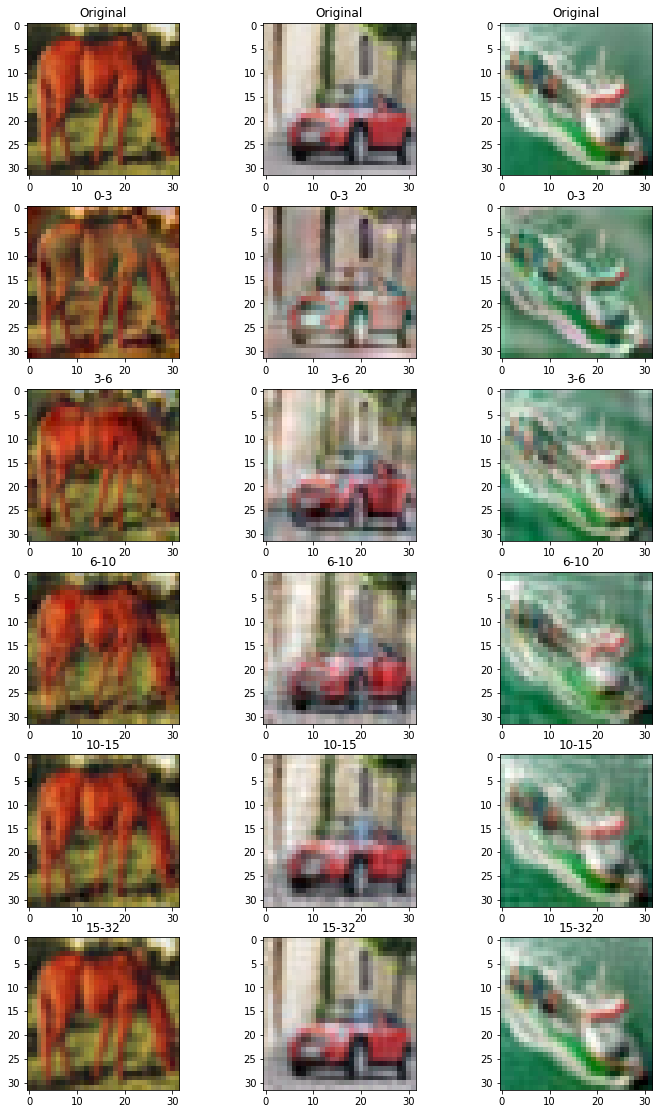

In [16]:
cifar_examples = pkl.load(open("CIFAR10_EXAMPLES.pkl", "rb"))
plot_examples(cifar_examples, 12, 10, 1, 5, 6)

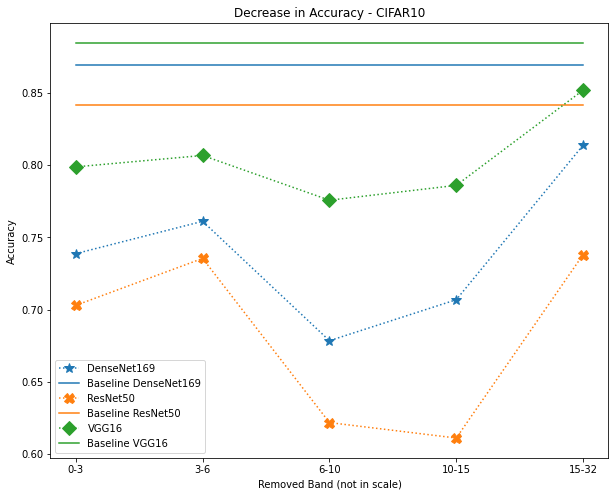

In [88]:
densenet_cifar_norm = pkl.load(open('2020-11-23_CIFAR10NORMALIZED_128DenseNetCifar_MDA.pkl', 'rb'))
resnet_cifar_norm = pkl.load(open('2020-11-23_CIFAR10NORMALIZED_128CifarResNet_MDA.pkl', 'rb'))
vgg16_cifar_norm = pkl.load(open( '2020-11-23_CIFAR10NORMALIZED_128VGG16_MDA.pkl', 'rb'))

plt.figure(figsize=(10, 8))
plt.title("Decrease in Accuracy - CIFAR10")
plot_graph_mda(densenet_cifar_norm, label="DenseNetCifar", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_cifar_norm, label="ResNetCifar", linestyle="dotted", marker="X", markersize=10)
plot_graph_mda(vgg16_cifar_norm, label="VGG16", linestyle="dotted", marker="D", markersize=10)
plt.legend()

### Outra visualização possível
Para demonstrar o ponto, comparar com MSE

"Importancia" = Baseline - Acc de frequencia removida

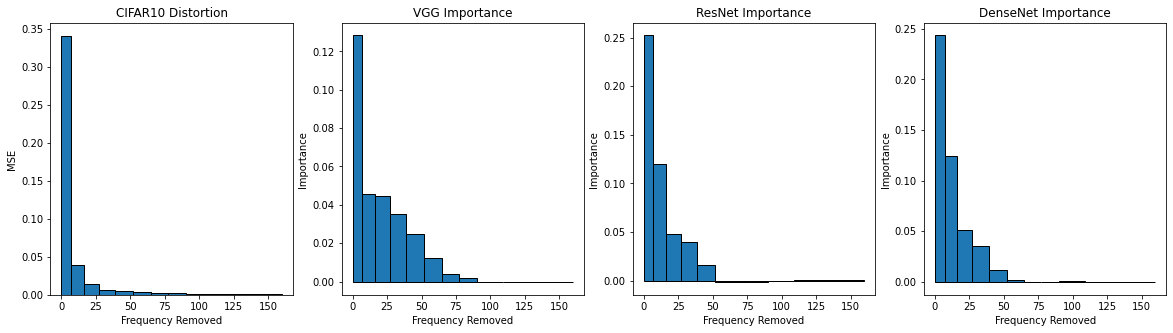

In [58]:
# rin
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_bar_mse(rin_examples, title="CIFAR10 Distortion")
plt.subplot(1, 4, 2)
plot_bar_imp(vgg16_rin, title="VGG Importance")
plt.subplot(1, 4, 3)
plot_bar_imp(resnet_rin, title="ResNet Importance")
plt.subplot(1, 4, 4)
plot_bar_imp(densenet_rin, title="DenseNet Importance")


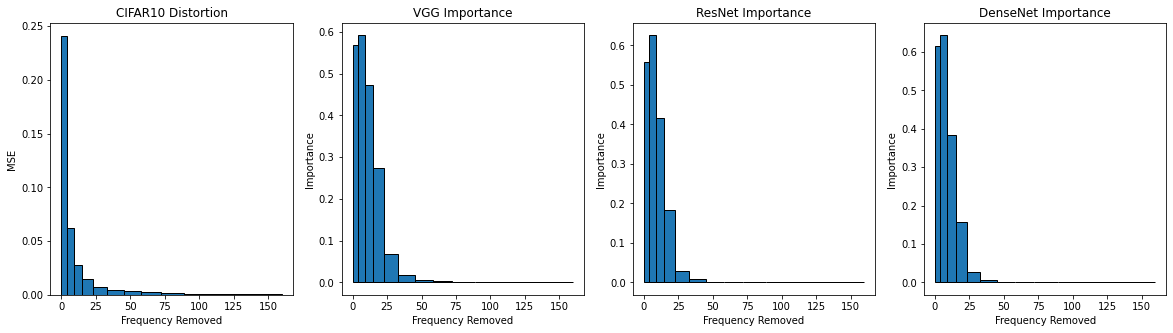

In [55]:
# vggface
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_bar_mse(vgg_examples, title="CIFAR10 Distortion")
plt.subplot(1, 4, 2)
plot_bar_imp(vgg16_vggface2, title="VGG Importance")
plt.subplot(1, 4, 3)
plot_bar_imp(resnet50_vggface2, title="ResNet Importance")
plt.subplot(1, 4, 4)
plot_bar_imp(densenet169_vggface2, title="DenseNet Importance")

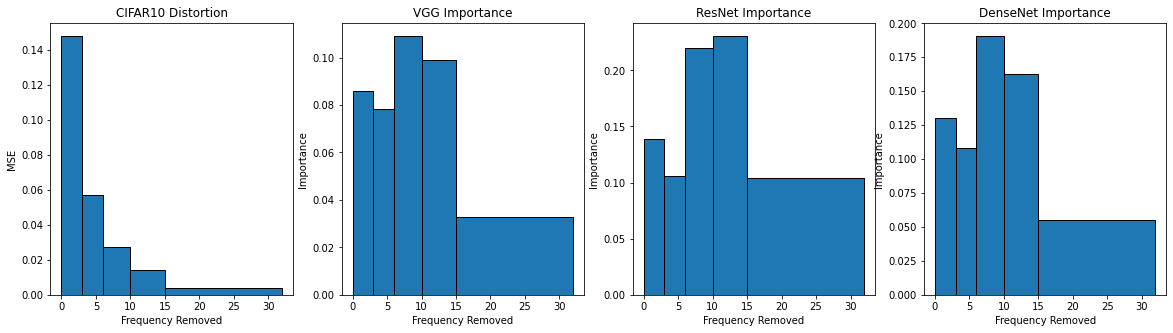

In [54]:
# cifar
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_bar_mse(cifar_examples, title="CIFAR10 Distortion")
plt.subplot(1, 4, 2)
plot_bar_imp(vgg_cifar_normalized, title="VGG Importance")
plt.subplot(1, 4, 3)
plot_bar_imp(resnet_cifar_normalized, title="ResNet Importance")
plt.subplot(1, 4, 4)
plot_bar_imp(densenet_cifar_normalized, title="DenseNet Importance")


## Outros Experimentos

### CIFAR10 - Sem Normalização
Normalização (dividir cada imagem por sua média e dividir por seu desvio padrão) é um preprocessamento comum. Usamos em todos os experimentos. Como o CIFAR10 é um dataset particularmente fácil podemos abrir mão dos ganhos, mas acabamos descobrindo que sem a normalização as redes tenderam a ir melhor nesse dataset (verificar se é sempre o caso)

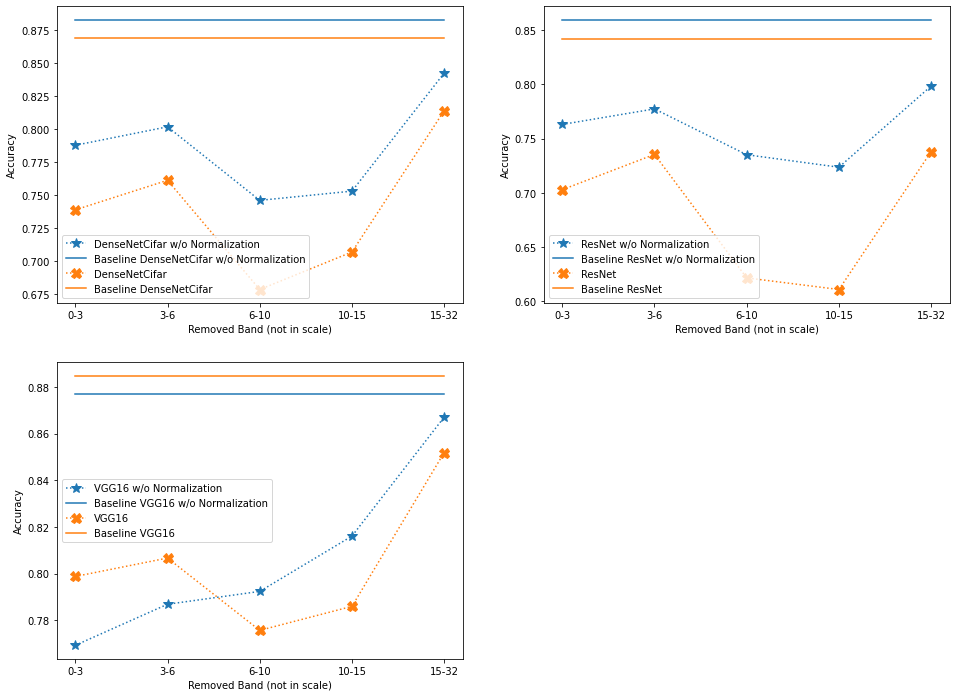

In [7]:
densenet_cifar = pkl.load(open('2020-11-23_CIFAR10_128DenseNetCifar_MDA.pkl', 'rb'))
densenet_cifar_normalized = pkl.load(open("2020-11-23_CIFAR10NORMALIZED_128DenseNetCifar_MDA.pkl", "rb"))

resnet_cifar = pkl.load(open("2020-11-09_CIFAR10_128CifarResNet_MDA.pkl", "rb"))
resnet_cifar_normalized = pkl.load(open("2020-11-23_CIFAR10NORMALIZED_128CifarResNet_MDA.pkl", "rb"))


vgg_cifar = pkl.load(open('2020-11-09_CIFAR10_128VGG16_MDA.pkl', "rb"))
vgg_cifar_normalized = pkl.load(open('2020-11-23_CIFAR10NORMALIZED_128VGG16_MDA.pkl', "rb"))

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plot_graph_mda(densenet_cifar, label="DenseNetCifar w/o Normalization", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(densenet_cifar_normalized, label="DenseNetCifar", linestyle="dotted", marker="X", markersize=10)
plt.legend()

plt.subplot(2, 2, 2)
plot_graph_mda(resnet_cifar, label="ResNet w/o Normalization", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_cifar_normalized, label="ResNet", linestyle="dotted", marker="X", markersize=10,)
plt.legend()

plt.subplot(2, 2, 3)
plot_graph_mda(vgg_cifar, label="VGG16 w/o Normalization", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(vgg_cifar_normalized, label="VGG16", linestyle="dotted", marker="X", markersize=10)
plt.legend()

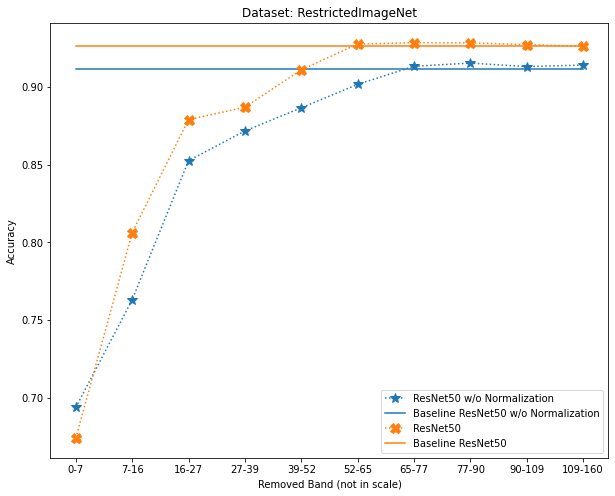

In [12]:
resnet_rin =  pkl.load(open('2020-09-13_RestrictedImageNet_ResNet50_MDA.pkl', 'rb'))
resnet_notnorm = pkl.load(open( '2020-12-14_RestrictedImageNet_64ResNet50_NOTNORMALIZED_MDA.pkl', 'rb'))

plt.figure(figsize=(10, 8))
plt.title("Dataset: RestrictedImageNet")
plot_graph_mda(resnet_notnorm, label="ResNet50 w/o Normalization", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(resnet_rin, label="ResNet50", linestyle="dotted", marker="X", markersize=10)
plt.legend()

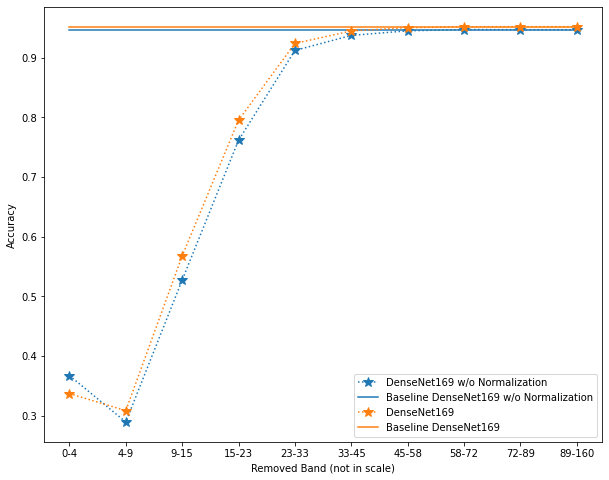

In [3]:
dense_vggnonorm = pkl.load(open("2020-12-19_VGGFace2_64DenseNet169_NOTNORMALIZED_10_MDA.pkl", "rb"))
dense_vgg = pkl.load(open("2020-11-10_VGGFace2_64DenseNet169_10_MDA.pkl", "rb"))

plt.figure(figsize=(10, 8))
plot_graph_mda(dense_vggnonorm, label="DenseNet169 w/o Normalization", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(dense_vgg, label="DenseNet169", linestyle="dotted", marker="*", markersize=10)
_ = plt.legend()

### VGGFace2 e Profundidade
No VGGFace2 treinamos versões mais e menos profundas das redes para procurar se há alguma relação

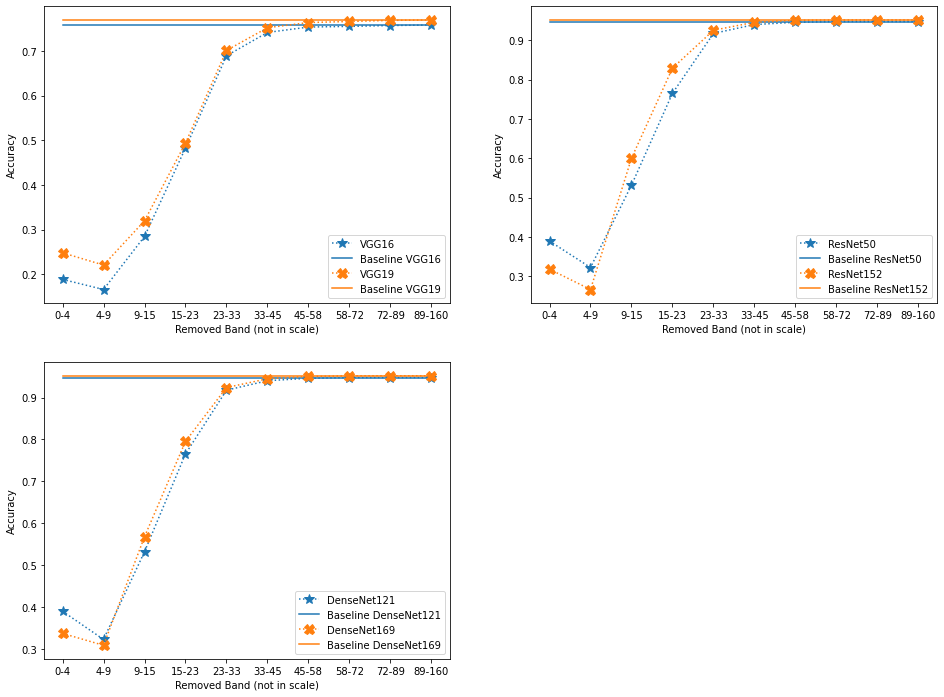

In [9]:
glob.glob("*VGGFace2*")
vgg16_vggface2 = pkl.load(open('2020-11-23_VGGFace2_64VGG16_3_MDA.pkl', 'rb'))
vgg19_vggface2 = pkl.load(open('2020-10-08_VGGFace2_64VGG19_3_MDA.pkl', 'rb'))

resnet50_vggface2 = pkl.load(open("2020-12-11_VGGFace2_64DenseNet121_10_MDA.pkl", "rb"))
resnet152_vggface2 = pkl.load(open("2020-10-24_VGGFace2_642020-10-18_VGGFace2_64ResNet152_6_4_MDA.pkl", "rb"))

densenet121_vggface2 = pkl.load(open('2020-12-11_VGGFace2_64DenseNet121_10_MDA.pkl', 'rb'))
densenet169_vggface2 = pkl.load(open('2020-11-10_VGGFace2_64DenseNet169_10_MDA.pkl', 'rb'))


plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plot_graph_mda(vgg16_vggface2, label="VGG16", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(vgg19_vggface2, label="VGG19", linestyle="dotted", marker="X", markersize=10)
plt.legend()

plt.subplot(2, 2, 2)
plot_graph_mda(resnet50_vggface2, label="ResNet50", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet152_vggface2, label="ResNet152", linestyle="dotted", marker="X", markersize=10,)
plt.legend()

plt.subplot(2, 2, 3)
plot_graph_mda(densenet121_vggface2, label="DenseNet121", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(densenet169_vggface2, label="DenseNet169", linestyle="dotted", marker="X", markersize=10)
plt.legend()


### Available options

In [4]:
datasets.show_available(datasets.AVAILABLE_TESTS)

Available datasets: RestrictedImageNet


In [16]:
# Choose 
DATASET_NAME = "RestrictedImageNet"
MODEL_NAME = "2020-09-01_RestrictedImageNet_VGG16"
PERCENT = 0.1 # we suggest 0.2 for CIFAR10 and 0.1 for everything else
BATCH_SIZE = 16

### Load Dataset and define bands

In [17]:
# Choose Dataset - check which ones are available
dataset = datasets.get_test_dataset(DATASET_NAME, datasets.default_datagen, BATCH_SIZE)

Found 10150 images belonging to 9 classes.


### Define Frequency Bands
Remember our theoretical energy distribution:

$\mathbb{E}[\text{energy[i, j]}] = \frac{A}{||(i, j)||_1^{\alpha}}$

We will adjust $A$ and $\alpha$ for this dataset using hyperopt to match the empirical distribution (represented here as the average energy per band on the test dataset)


In [7]:
# Version for full dataset in memory
#dataset_shape = X_test.shape[1], X_test.shape[2]
#emp_dist = utils.get_mean_energy_dataset(X_test)

In [18]:
# Version for generators
emp_dist = utils.get_mean_energy_iterator(dataset.test_datagen)

<ipython-input-19-900d04066420>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(emp_dist), cmap="hot")


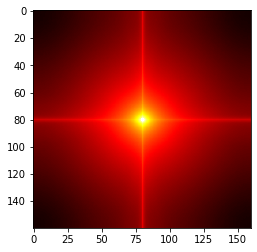

In [19]:
plt.imshow(np.log(emp_dist), cmap="hot")

Text(0.5, 1.0, 'Energy Distribution (CIFAR10)')

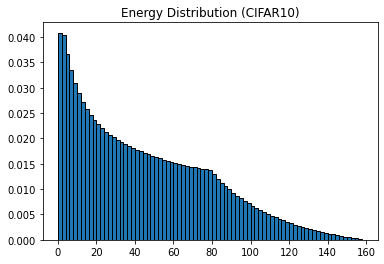

In [20]:
steps = np.arange(0, dataset.input_shape[1], 2)
height, width = utils.get_energy_histogram(emp_dist, steps)
plt.bar(steps[:-1], height, width, edgecolor="black", align="edge")
plt.title("Energy Distribution (CIFAR10)")

Text(0.5, 1.0, 'Energy Distribution (Restricted ImageNet)')

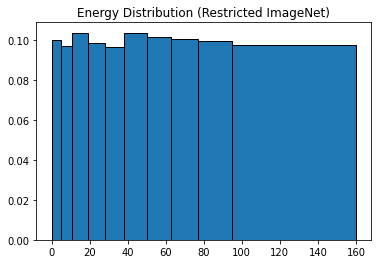

In [30]:
percent_range = utils.get_percentage_masks_relevance(emp_dist, PERCENT)
height, width = utils.get_energy_histogram(emp_dist, percent_range)
plt.bar(percent_range[0:-1], height, width, edgecolor="black", align="edge")
plt.title("Energy Distribution (Restricted ImageNet)")

### Load Model and Weights

In [13]:
mod = kr.models.load_model("model_weights/" + MODEL_NAME)

#### Calculate Baseline

In [23]:
baseline_acc = utils.get_accuracy_iterator(mod, dataset.test_datagen)

In [24]:
baseline_acc

0.6409852216748768

In [25]:
removed_acc = []
for i in range(len(percent_range) - 1):
    preproc = lambda Xfr: utils.remove_frequency_ring_dataset(Xfr, percent_range[i], percent_range[i + 1])
    removed_acc.append(utils.get_accuracy_iterator(mod, dataset.test_datagen, preproc=preproc))

<BarContainer object of 10 artists>

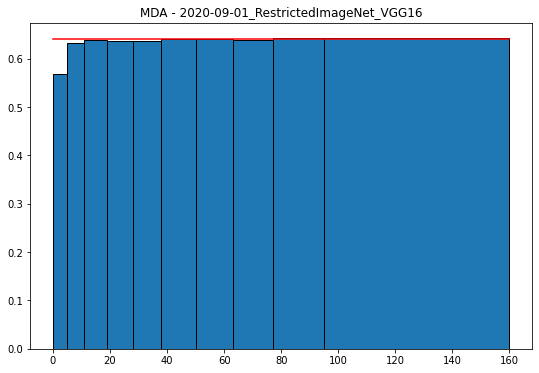

In [32]:
plt.figure(figsize=(9, 6))
plt.title("MDA - " + MODEL_NAME)
plt.plot(percent_range, [baseline_acc] * len(percent_range), color="red")
plt.bar(percent_range[0:-1], removed_acc, width, edgecolor="black", align="edge")
#plt.savefig("MDA_" + MODEL_NAME + ".png")

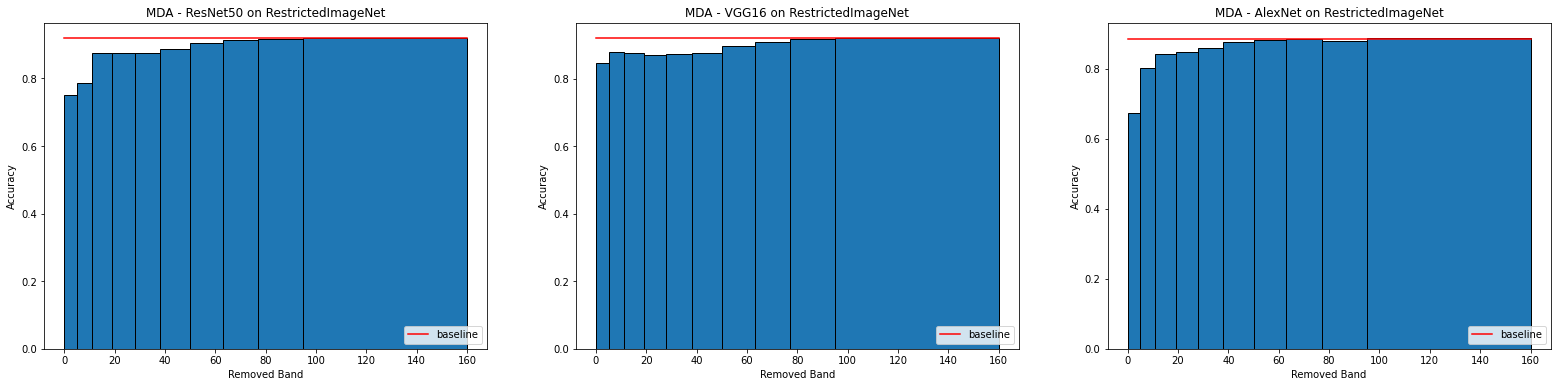

In [4]:
def plot_mda(percent_range, baseline_acc, removed_acc, width):
    plt.plot(percent_range, [baseline_acc] * len(percent_range), color="red", label="baseline")
    plt.bar(percent_range[0:-1], removed_acc, width, edgecolor="black", align="edge")
    plt.xlabel("Removed Band")
    plt.ylabel("Accuracy")
    plt.legend()

import pickle as pkl
resnet_data = pkl.load(open("2020-09-13_RestrictedImageNet_ResNet50_MDA.pkl", "rb"))
resnet_baseline_acc = resnet_data["baseline_acc"]
resnet_percent_range = resnet_data["percent_range"]
resnet_removed_acc = resnet_data["removed_acc"]
width = [resnet_percent_range[i + 1] - resnet_percent_range[i] for i in range(len(resnet_percent_range) -1)]

vgg_data = pkl.load(open("2020-09-14_RestrictedImageNet_64VGG16_MDA.pkl", "rb"))
vgg_baseline_acc = vgg_data["baseline_acc"]
vgg_percent_range = vgg_data["percent_range"]
vgg_removed_acc = vgg_data["removed_acc"]

alexnet_data = pkl.load(open("2020-09-15_RestrictedImageNet_64AlexNet_MDA.pkl", "rb"))
alexnet_baseline_acc = alexnet_data["baseline_acc"]
alexnet_percent_range = alexnet_data["percent_range"]
alexnet_removed_acc = alexnet_data["removed_acc"]

plt.figure(figsize=(27, 6))
plt.subplot(1, 3, 1)
plt.title("MDA - ResNet50 on RestrictedImageNet")
plot_mda(resnet_percent_range, resnet_baseline_acc, resnet_removed_acc, width)
plt.subplot(1, 3, 2)
plt.title("MDA - VGG16 on RestrictedImageNet")
plot_mda(vgg_percent_range, vgg_baseline_acc, vgg_removed_acc, width)
plt.subplot(1, 3, 3)
plt.title("MDA - AlexNet on RestrictedImageNet")
plot_mda(alexnet_percent_range, alexnet_baseline_acc, alexnet_removed_acc, width)


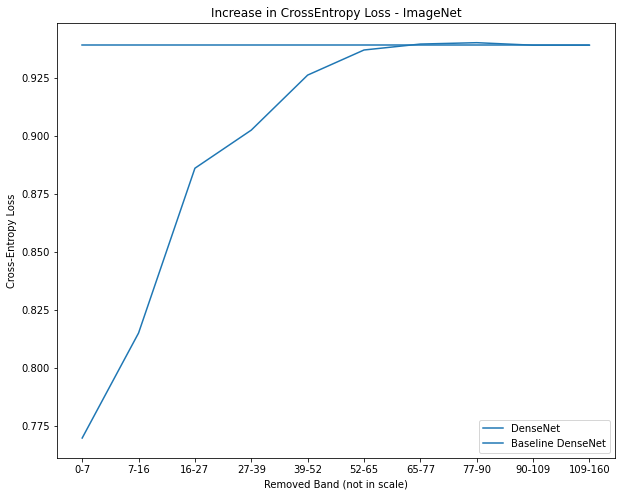

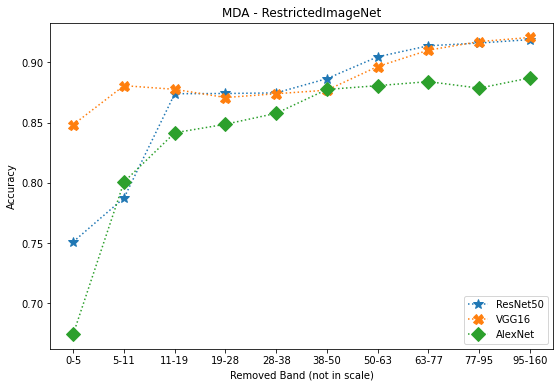

In [5]:
plt.figure(figsize=(9, 6))
plt.title("MDA - RestrictedImageNet")
plt.plot(range(len(resnet_removed_acc)), resnet_removed_acc, linestyle="dotted", marker="*", markersize=10, label="ResNet50")
plt.plot(range(len(vgg_removed_acc)), vgg_removed_acc, linestyle="dotted", marker="X", markersize=10, label="VGG16")
plt.plot(range(len(alexnet_removed_acc)), alexnet_removed_acc, linestyle="dotted", marker="D", markersize=10, label="AlexNet")
plt.ylabel("Accuracy")
plt.xlabel("Removed Band (not in scale)")
_ = plt.xticks(ticks=range(len(resnet_removed_acc)), labels=["-".join([str(alexnet_percent_range[i]), str(alexnet_percent_range[i + 1])]) for i in range(len(alexnet_percent_range) -1)])
plt.legend(loc=4)

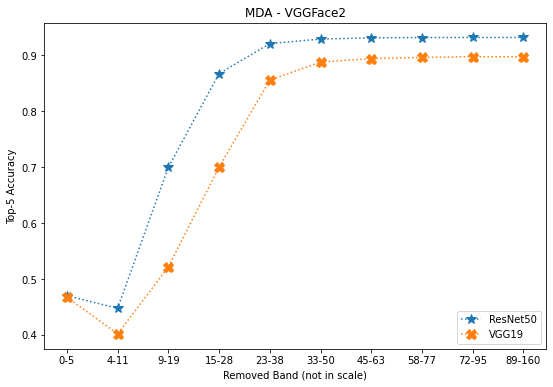

In [16]:
plt.figure(figsize=(9, 6))
resnet_facedata = pkl.load(open("2020-09-20_VGGFace2_64ResNet50_10_MDA.pkl", "rb"))
resnet_face_removed_acc = resnet_facedata["removed_acc"]
resnet_face_percent_range = resnet_facedata["percent_range"]

vgg_facedata = pkl.load(open("2020-10-08_VGGFace2_64VGG19_3_MDA.pkl", "rb"))
vgg_face_removed_acc = vgg_facedata["removed_acc"]

plt.title("MDA - VGGFace2")
plt.ylabel("Top-5 Accuracy")
plt.xlabel("Removed Band (not in scale)")
plt.plot(range(len(resnet_face_removed_acc)), resnet_face_removed_acc, linestyle="dotted", marker="*", markersize=10, label="ResNet50")
plt.plot(range(len(vgg_face_removed_acc)), vgg_face_removed_acc, linestyle="dotted", marker="X", markersize=10, label="VGG19")
_ = plt.xticks(ticks=range(len(resnet_face_removed_acc)), labels=["-".join([str(resnet_face_percent_range[i]), str(resnet_percent_range[i + 1])]) for i in range(len(alexnet_percent_range) -1)])
plt.legend(loc=4)

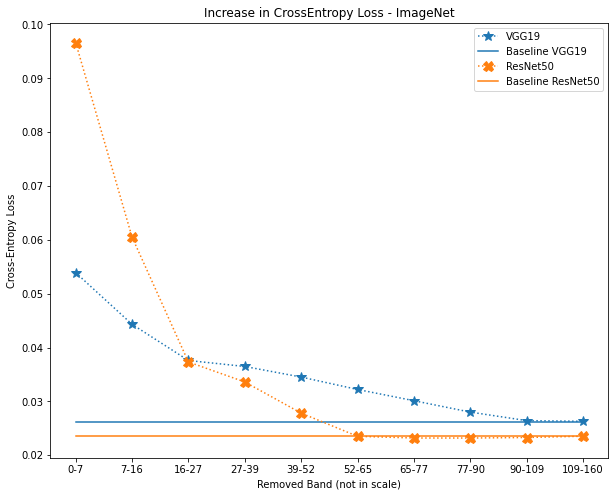

In [25]:
def plot_graph_mda(apkl, title="", **kwargs):
    removed_acc = apkl["removed_acc"]
    percent_range = apkl["percent_range"]
    baseline_acc = apkl["baseline_acc"]
    
    plt.ylabel("Cross-Entropy Loss")
    plt.xlabel("Removed Band (not in scale)")
    plot = plt.plot(range(len(removed_acc)), removed_acc, **kwargs)
    colorplot = plot[0].get_color()
    plt.plot(range(len(removed_acc)), [baseline_acc] * len(removed_acc), color=colorplot, label="Baseline " + kwargs["label"])
    _ = plt.xticks(ticks=range(len(removed_acc)), labels=["-".join([str(percent_range[i]), str(percent_range[i + 1])]) for i in range(len(percent_range) -1)])
    
import glob
import pickle as pkl
data = glob.glob("*MDCE*")
vgg_imagenet = pkl.load(open("2020-10-18_RestrictedImageNet_64VGG19_MDCE.pkl", "rb"))
resnet_imagenet = pkl.load(open("2020-09-20_VGGFace2_64ResNet50_10_MDCE.pkl", "rb"))
plt.figure(figsize=(10, 8))
plt.title("Increase in CrossEntropy Loss - ImageNet")
plot_graph_mda(vgg_imagenet, linestyle="dotted", marker="*", markersize=10, label="VGG19")
plot_graph_mda(resnet_imagenet, linestyle="dotted", marker="X", markersize=10, label="ResNet50")
plt.legend()

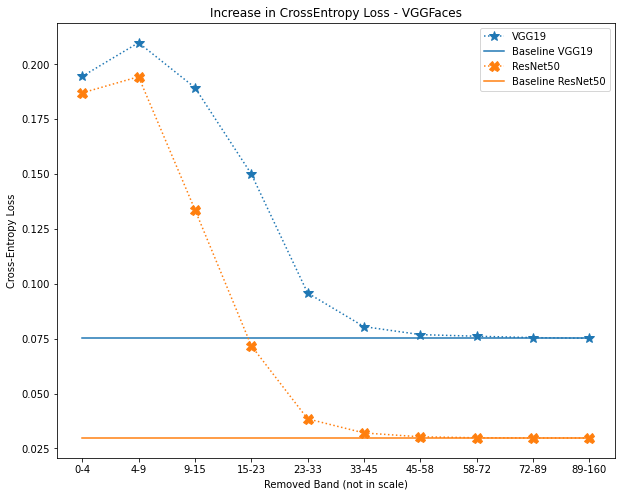

In [27]:
vgg_faces = pkl.load(open("2020-10-08_VGGFace2_64VGG19_3_MDCE.pkl", "rb"))
resnet_faces = pkl.load(open("2020-09-20_VGGFace2_64ResNet50_10_MDCE.pkl", "rb"))
plt.figure(figsize=(10, 8))
plt.title("Increase in CrossEntropy Loss - VGGFaces")
plot_graph_mda(vgg_faces, linestyle="dotted", marker="*", markersize=10, label="VGG19")
plot_graph_mda(resnet_faces, linestyle="dotted", marker="X", markersize=10, label="ResNet50")
plt.legend()

In [22]:
pkl.load(open(data[3], "rb"))

{'percent_range': [0, 7, 16, 27, 39, 52, 65, 77, 90, 109, 160],
 'removed_acc': [0.0966041963793374,
  0.0605002164370908,
  0.037314987981260705,
  0.03360211057615985,
  0.027817037939438093,
  0.023510204806116413,
  0.02319300130670294,
  0.023188182086192916,
  0.023286416154776887,
  0.023524635037765126],
 'baseline_acc': 0.02349194893696038}

# Appendix

### Optional: visualize dataset images

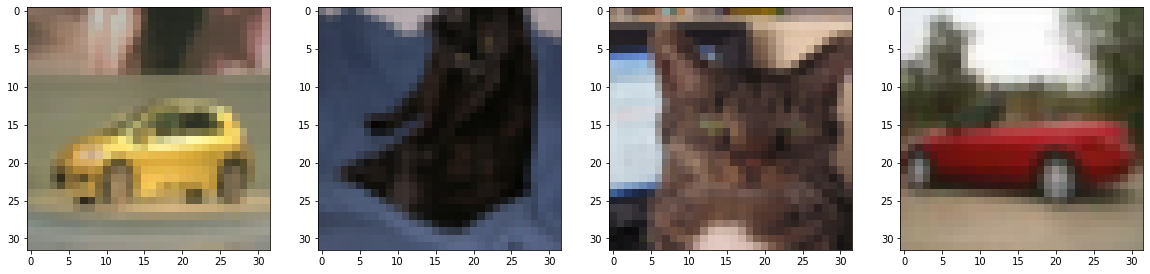

In [45]:
chosen = np.random.choice(np.arange(X_test.shape[0]), 4, replace=False)
Xchosen = X_test[chosen]

plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.imshow(Xchosen[0])
plt.subplot(1, 4, 2)
plt.imshow(Xchosen[1])
plt.subplot(1, 4, 3)
plt.imshow(Xchosen[2])
plt.subplot(1, 4, 4)
plt.imshow(Xchosen[3])

### Optional: visualize images filtered

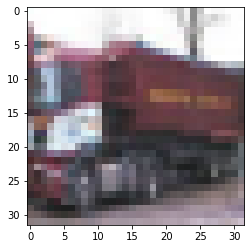

In [260]:
# assuming X_test, emp_dist and percent_range already calculated
chosen = np.random.choice(np.arange(X_test.shape[0]))
Xchosen = X_test[chosen]
_ = plt.imshow(Xchosen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


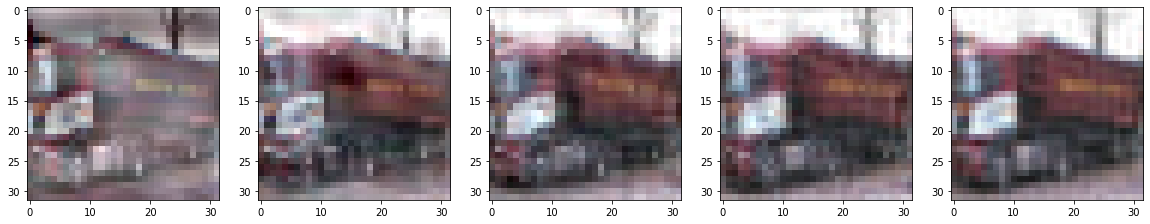

In [280]:
plt.figure(figsize=(20, 10))

for i in range(len(percent_range) - 1):
    nowchosen = utils.remove_frequency_ring(Xchosen, percent_range[i], percent_range[i + 1])
    plt.subplot(1 + int(len(percent_range) > 6), 5, i + 1)
    plt.imshow(nowchosen)